<a href="https://colab.research.google.com/github/Ethanwood1886/COM5004EWCW1/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier



# Load the dataset
df = pd.read_csv('diabetes.csv')

# Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [56]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure',
        'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
        'Age']]
y = df['Outcome']

In [83]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the 'n_neighbors' parameter
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [86]:
# Predictions
y_pred_knn = knn.predict(X_test_scaled)

In [87]:
# Apply Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10)  # You can tune the 'max_depth' parameter
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [88]:
# Predictions
y_pred_dt = dt.predict(X_test)

In [89]:
# Apply Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # You can adjust hyperparameters
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [90]:
# Predictions
y_pred_rf = rf.predict(X_test)

In [91]:
# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accaracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7012987012987013
Decision Tree Accuracy: 0.696969696969697
Random Forest Accaracy: 0.7445887445887446
Confusion Matrix:
 [[119  32]
 [ 37  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



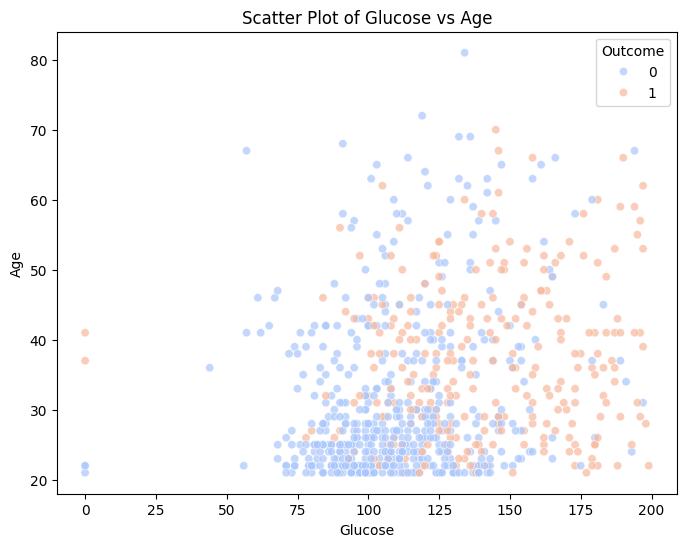

In [66]:
# KNN Visualisation

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Glucose'], y=df['Age'], hue=df['Outcome'], palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Glucose vs Age')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

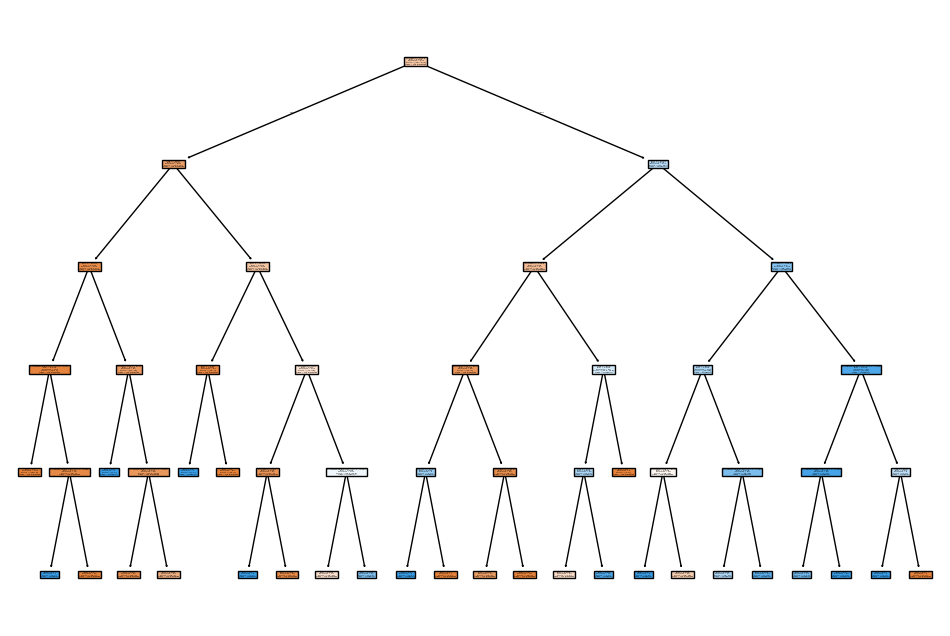

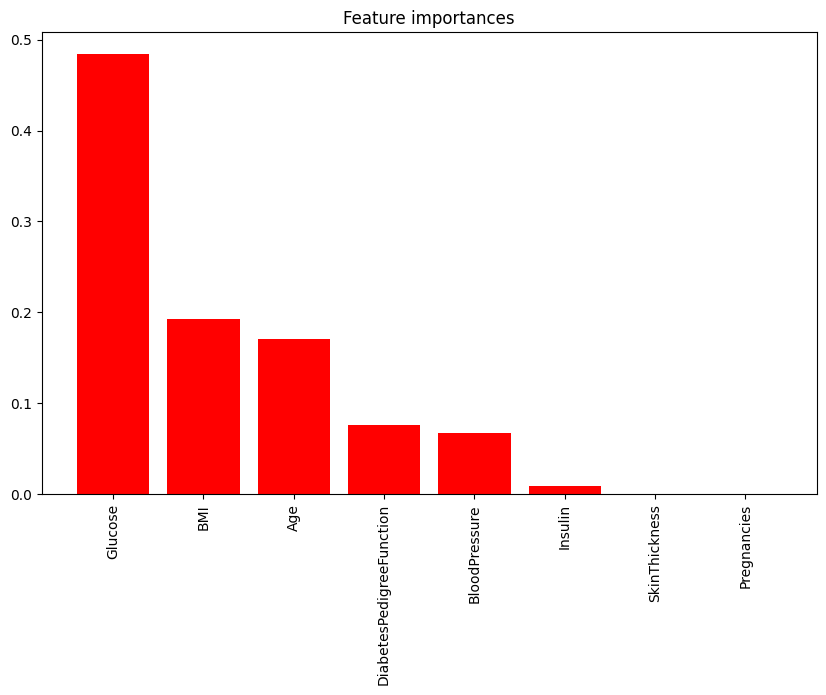

In [67]:
# Decision Tree Visualisation

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=df.columns[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()
